In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy
import numpy as np
import glob
from scipy.stats import mannwhitneyu
from matplotlib.pyplot import subplot_mosaic as mosaic
import matplotlib.transforms as mtransforms
import math
import matplotlib

## Preparations

In [2]:
cwd = os.getcwd()
n = 100 # nb of random partitions
k = 5000 # nb of max top_k_edges selected
m = 10 # number of iterations on confounder-based partitions
ct_sels = ['BRCA', 'CESC', 'COAD', 'GBM', 'HNSC', 'KIRC', 'KIRP', 'LUSC', 'PCPG', 'READ', 'STAD']
confs = ['age_at_initial_pathologic_diagnosis', 'gender.demographic', 'race.demographic', 'tumor_stage.diagnoses']
algs = ['ARACNE', 'CEMITOOL', 'GRNBOOST2', 'WGCNA'] # string identifiers of algorithms
alpha = 0.05

## Read data from Jaccard Indices for all tools, confounders, cohorts and partition types

In [4]:
JI = pd.DataFrame(columns = ['Confounder/\nvariable', 'Cohort', 'Method', 'Partition type', 'partID', 'k', 'mean JI'])
for alg_sel in algs:
    for conf_sel in confs:
        for ct_sel in ct_sels:
            path = os.path.join(cwd, alg_sel, str(ct_sel))#'JI_'+str(alg_sel)+'_'+str(ct_sel))
            for i in range(m):
                filename = 'cb'+'_'+str(i)+'_'+alg_sel+'_'+conf_sel+'_'+ct_sel+'_jaccInd.csv'
                try:
                    df_conf = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                    df_conf['partID'] = i
                    df_conf['Partition type'] = 'confounder-based partition'
                    df_conf['Method'] = alg_sel
                    df_conf['Cohort'] = ct_sel
                    df_conf['Confounder/\nvariable'] = conf_sel
                except:
                    print(filename)
                    continue
                JI = pd.concat([JI, df_conf])
                
for alg_sel in algs:
    for conf_sel in confs:
        for ct_sel in ct_sels:
            path = os.path.join(cwd, alg_sel, str(ct_sel))#'JI_'+str(alg_sel)+'_'+str(ct_sel))
            for i in range(n):
                filename = 'rnd'+'_'+str(i)+'_'+alg_sel+'_'+conf_sel+'_'+ct_sel+'_jaccInd.csv'
                try:
                    df_rnd = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                    df_rnd['partID'] = i
                    df_rnd['Partition type'] = 'random partition'
                    df_rnd['Method'] = alg_sel
                    df_rnd['Cohort'] = ct_sel
                    df_rnd['Confounder/\nvariable'] = conf_sel
                except:
                    print(filename)
                    continue
                JI = pd.concat([JI, df_rnd])
JI_all = JI.copy()
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['race'], 'ethnicity')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['race.demographic'], 'ethnicity')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['gender.demographic'], 'sex')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['tumor_stage.diagnoses'], 'stage')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['age_at_initial_pathologic_diagnosis'], 'age')
JI_all.rename(columns={'mean JI': 'Mean JI'}, inplace=True)
confs = ['age', 'ethnicity', 'sex', 'stage']
JI_all = JI_all[JI_all['k']%100 == 10]
JI_all['Method'] = JI_all['Method'].replace(['ARACNE'], 'ARACNe-AP').replace(['CEMITOOL'], 'CEMiTool').replace(['GRNBOOST2'], 'GRNBoost2')
JI_all['Cohort x\nConfounder'] = JI_all['Cohort'] + ' x ' + JI_all['Confounder/\nvariable']
JI_all.reset_index(inplace=True)

rnd_0_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_1_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_2_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_3_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_4_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_5_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_6_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_7_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_8_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_9_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_10_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_11_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_12_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_13_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_14_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_15_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_16_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_17_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_18_CEMITOOL_gender.demographic_BRCA_jaccInd.csv
rnd_19_CEMITOOL_gender

In [4]:
JI_all = JI.copy()
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['race'], 'ethnicity')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['race.demographic'], 'ethnicity')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['gender.demographic'], 'sex')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['tumor_stage.diagnoses'], 'stage')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['age_at_initial_pathologic_diagnosis'], 'age')
JI_all.rename(columns={'mean JI': 'Mean JI'}, inplace=True)
confs = ['age', 'ethnicity', 'sex', 'stage']
JI_all = JI_all[JI_all['k']%100 == 10]
JI_all['Method'] = JI_all['Method'].replace(['ARACNE'], 'ARACNe-AP').replace(['CEMITOOL'], 'CEMiTool').replace(['GRNBOOST2'], 'GRNBoost2')
JI_all['Cohort x\nConfounder'] = JI_all['Cohort'] + ' x ' + JI_all['Confounder/\nvariable']
JI_all.reset_index(inplace=True)

## Generate plots for supplement

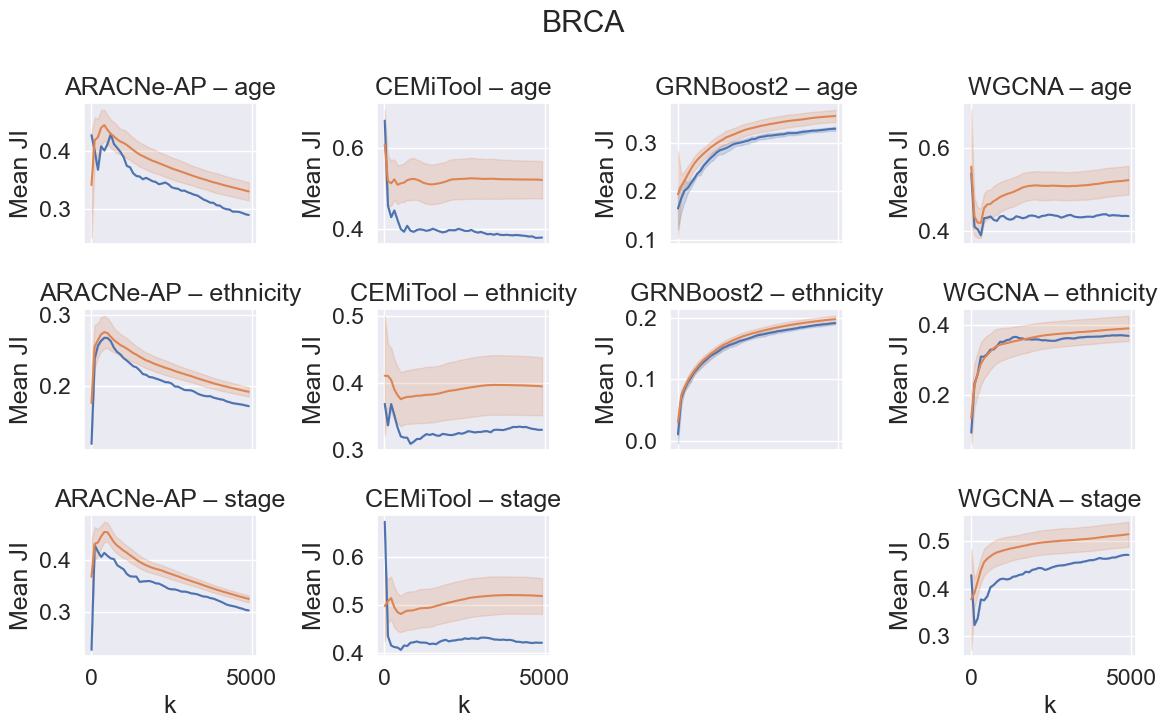

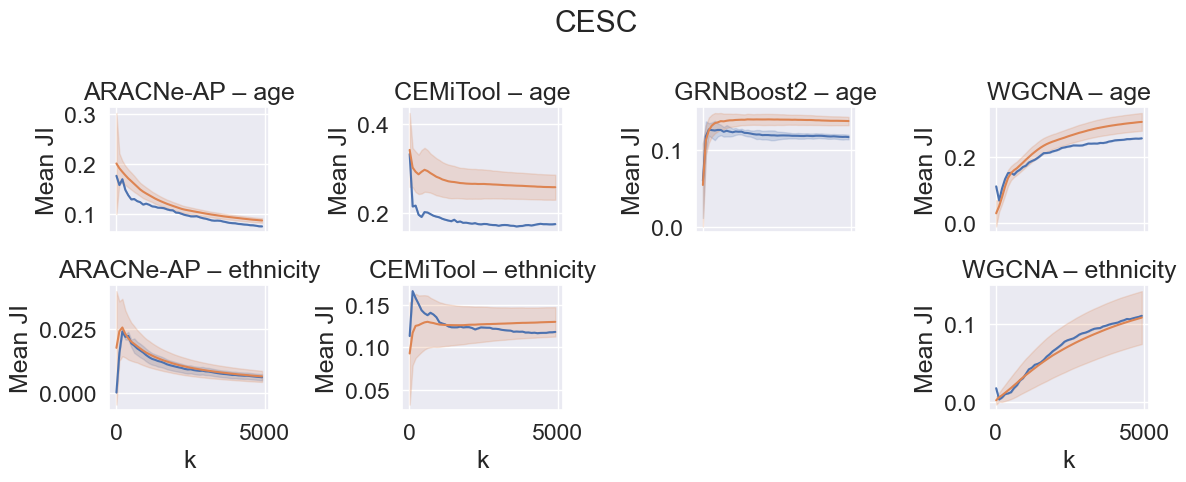

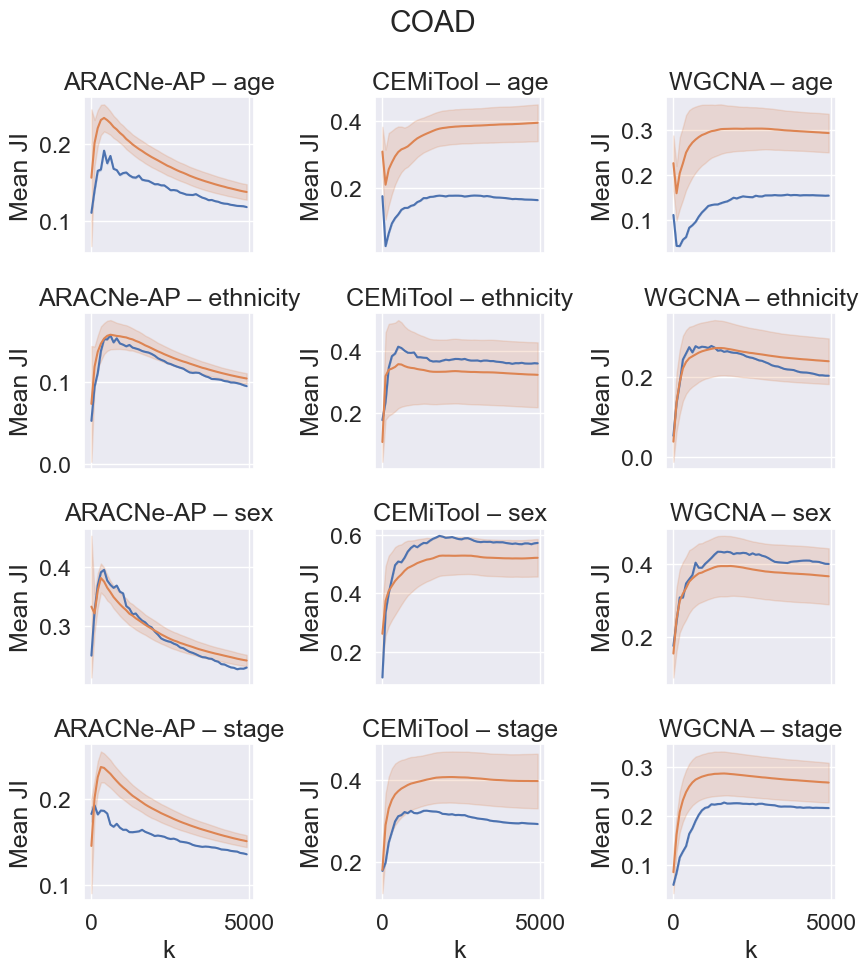

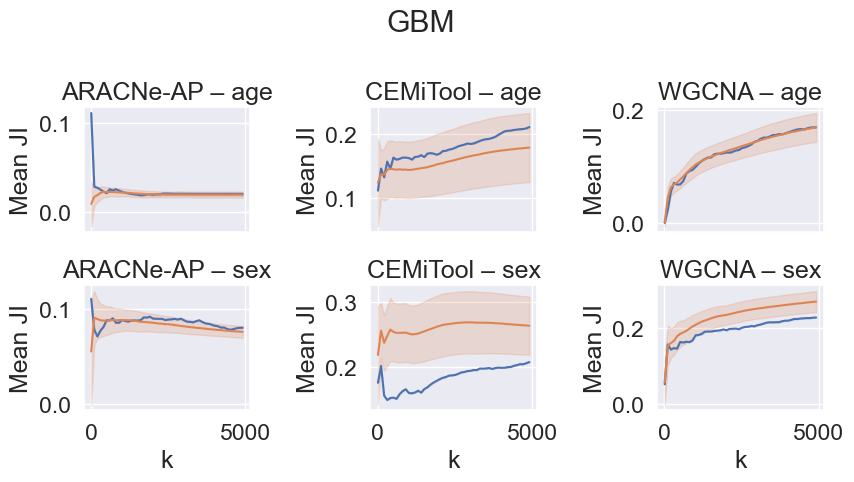

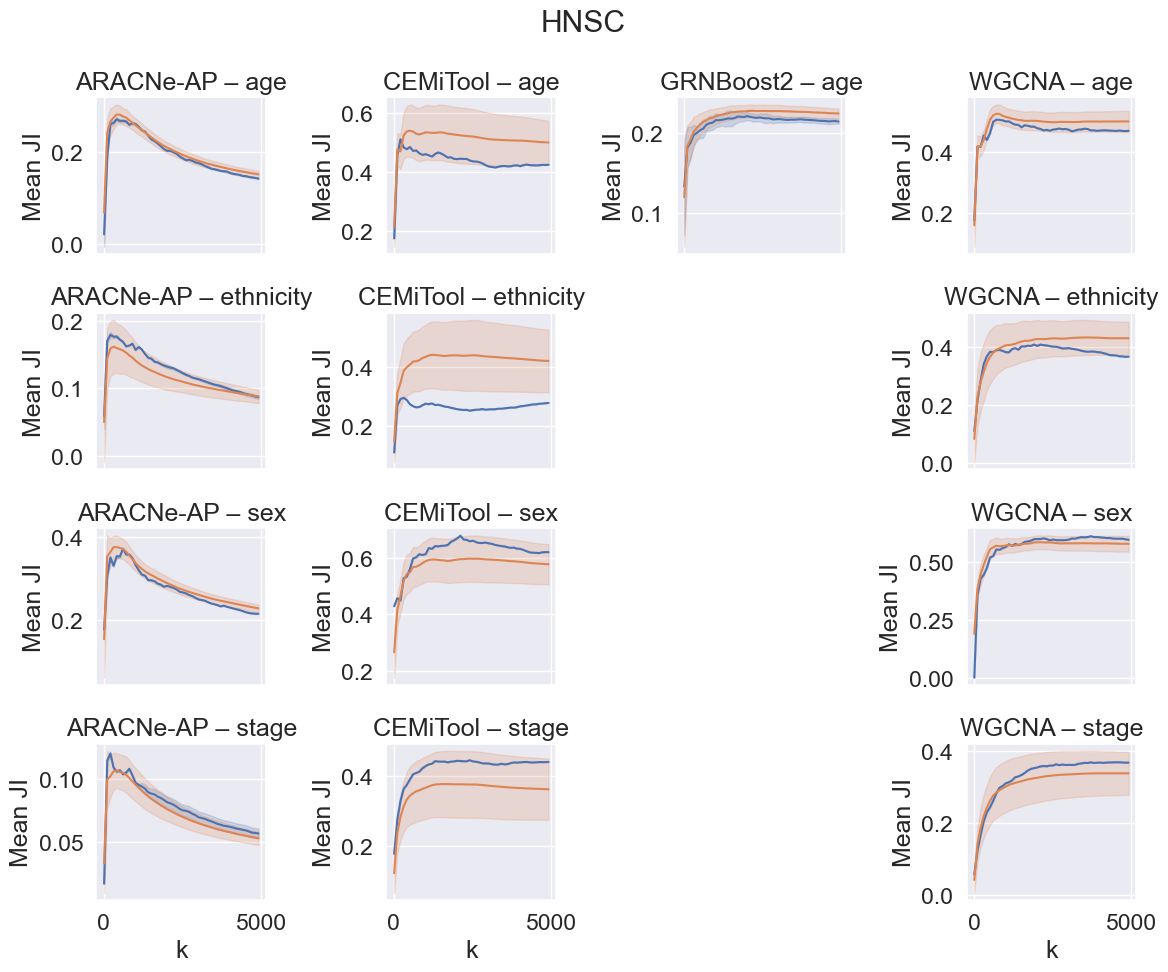

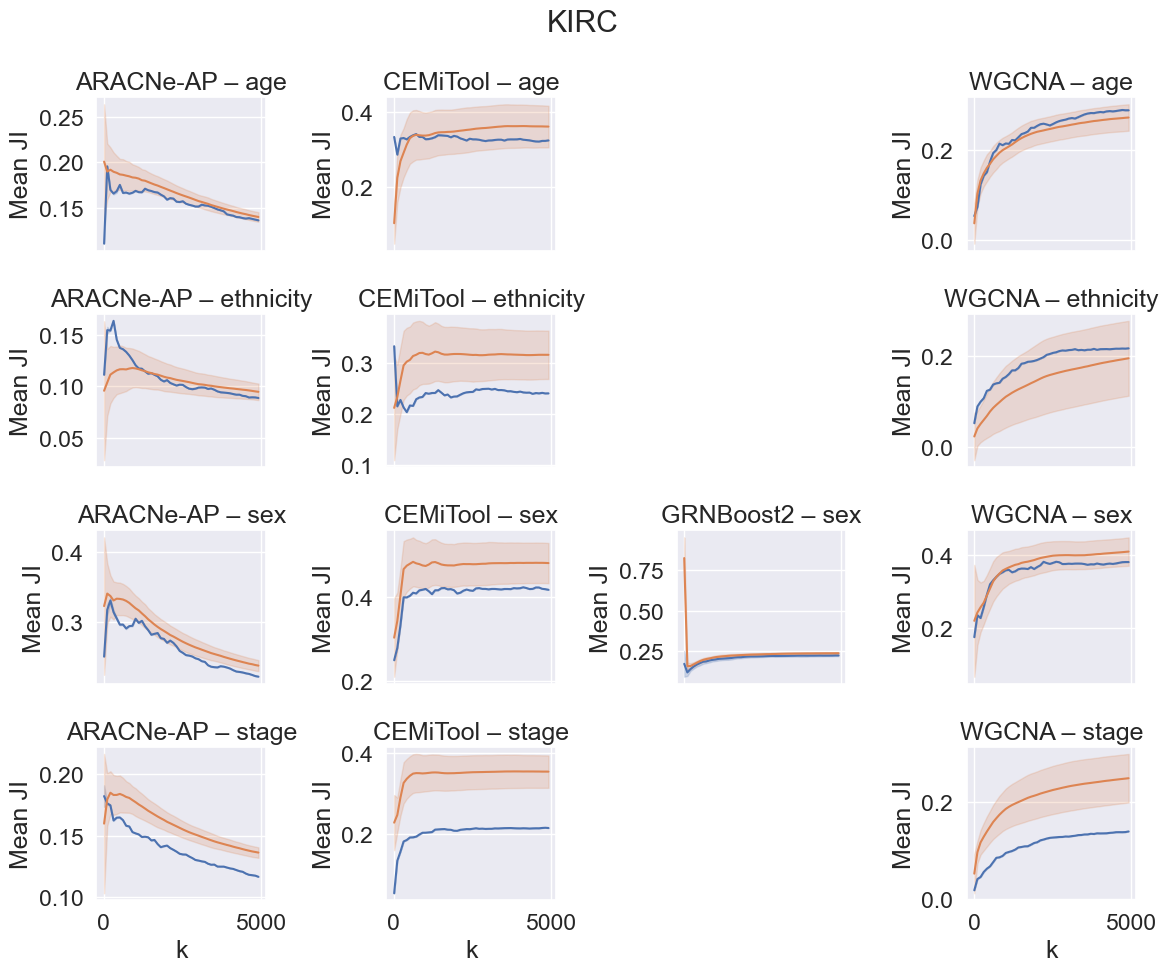

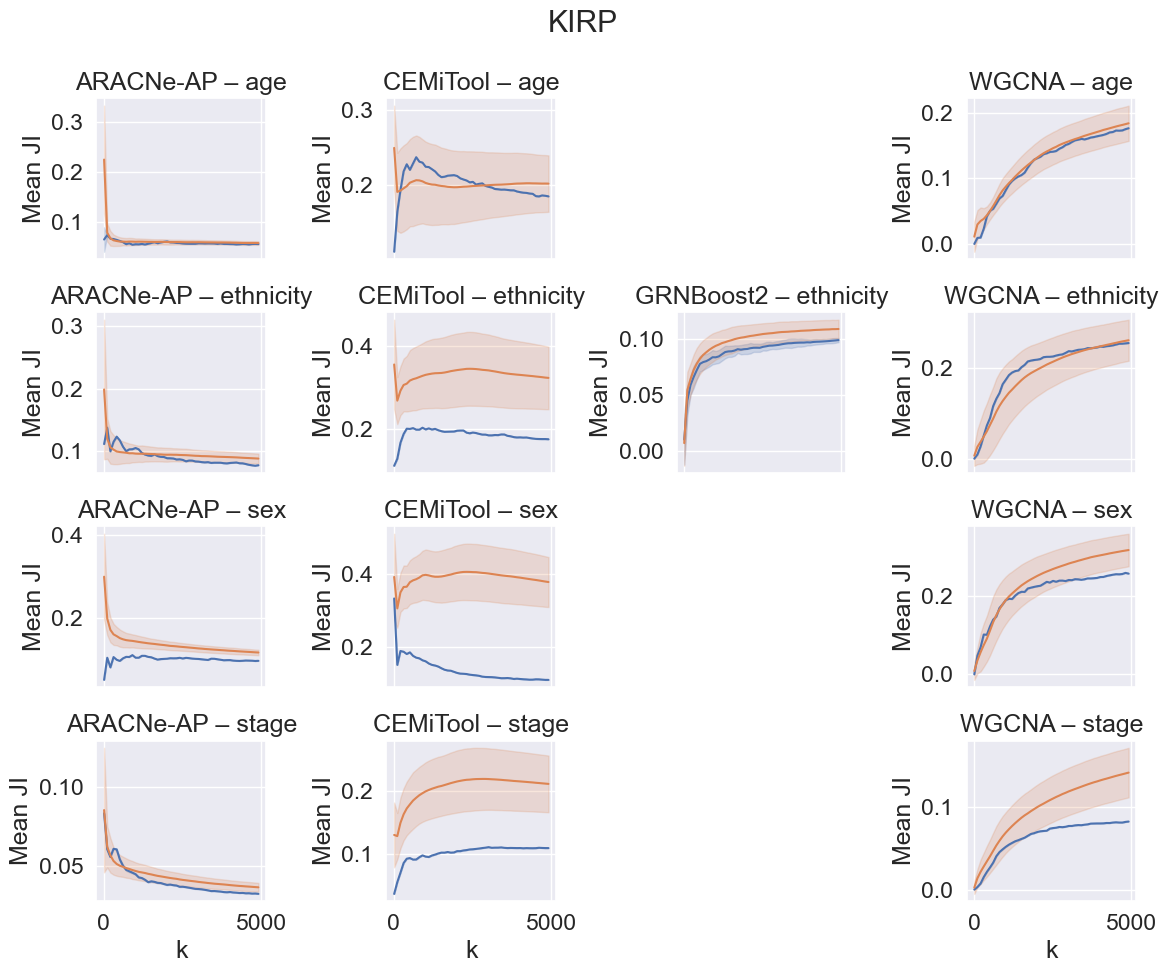

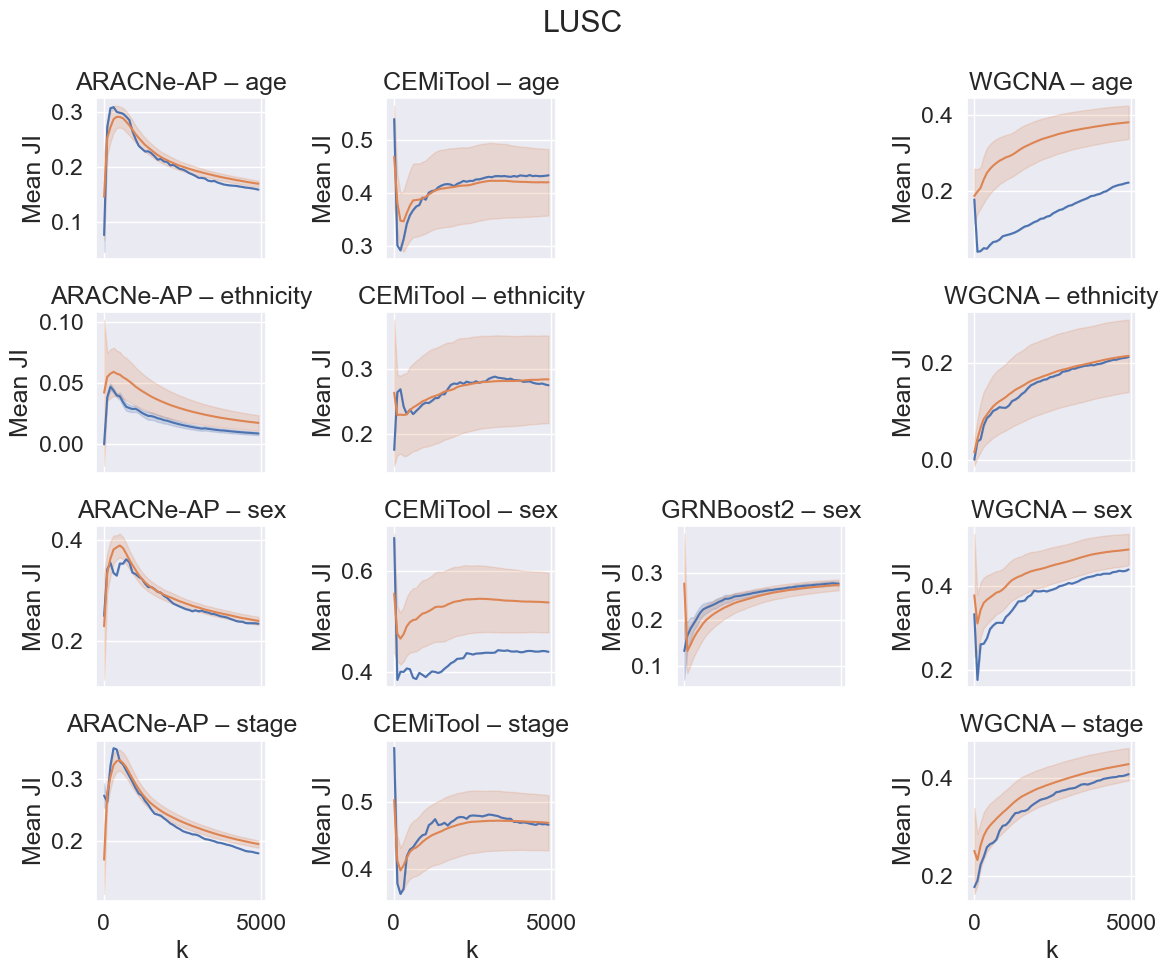

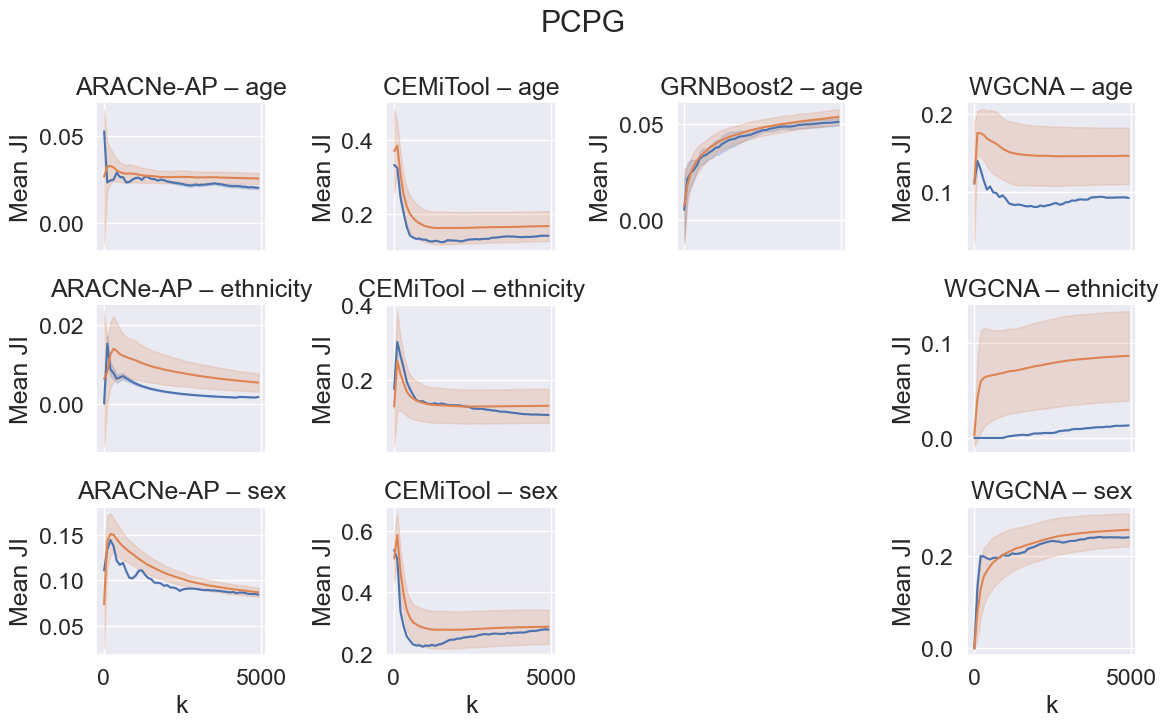

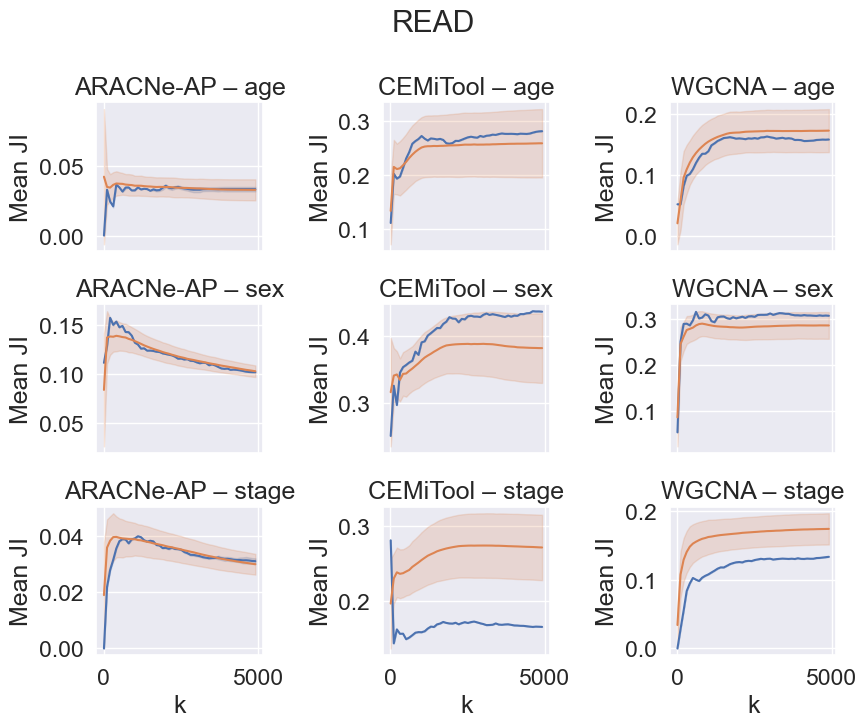

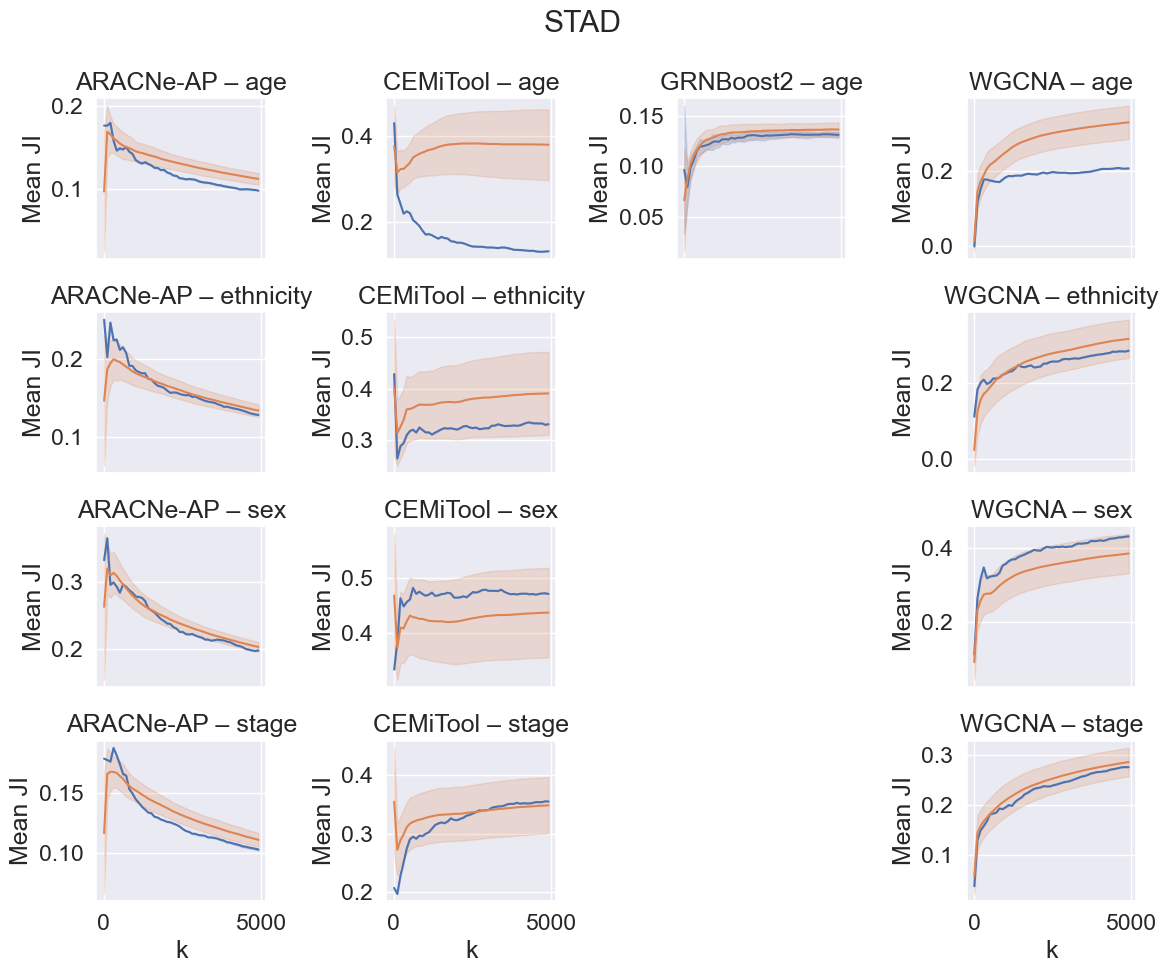

In [7]:
plt.style.use('default')
sns.set(font_scale=1.5)
sns.set_style('darkgrid')
for ct_sel in ct_sels:
    JI_ct = JI_all[JI_all['Cohort']==ct_sel]
    confounders = sorted(list(set(JI_ct['Confounder/\nvariable'].values)))
    algos = sorted(list(set(JI_ct['Method'].values)))
    fig, axs = plt.subplots(len(confounders), len(algos), figsize=(3*len(algos), 2.5*len(confounders)), sharex=True, sharey=False)
    for i, conf in enumerate(confounders):
        JI_conf = JI_ct[JI_ct['Confounder/\nvariable'] == conf]
        for j, algo in enumerate(algos):
            JI_alg = JI_conf[JI_conf['Method'] == algo]
            if JI_alg.shape[0] == 0:
                axs[i, j].axis('off')
            else:
                sns.lineplot(data=JI_alg, x='k', y='Mean JI', errorbar='sd', ax=axs[i,j], hue='Partition type', legend=False)
                axs[i,j].set_title(f'{algo} – {conf}')
    fig.suptitle(ct_sel)
    fig.tight_layout()
    fig.savefig(f'plots/{ct_sel}_block_comparisons.pdf')

## Compute P-values of one-sided Mann-Whitney U-test for each k

In [10]:
mwus = pd.DataFrame(columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
for alg_sel in ['ARACNe-AP', 'CEMiTool', 'GRNBoost2', 'WGCNA']:
    JI_ = JI_all[JI_all['Method'] == alg_sel]
    for cohort in ct_sels:
        coh = JI_[JI_['Cohort'] == cohort]
        for conf_sel in confs:
            conf = coh[coh['Confounder/\nvariable'] == conf_sel]
            if len(conf) == 0:
                continue
            c = conf[conf['Partition type']=='confounder-based partition']
            r = conf[conf['Partition type']=='random partition']
            for k in sorted(list(set(c['k']))):
                c_k = c[c['k'] == k]
                r_k = r[r['k'] == k]
                mwu = mannwhitneyu(c_k['Mean JI'],r_k['Mean JI'], alternative='less')
                df = pd.DataFrame([[alg_sel, cohort, conf_sel, k, mwu.pvalue]], columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
                mwus = pd.concat([mwus, df])
                
mwus.reset_index(inplace=True)
mwus = mwus.drop('index', axis=1).drop('k', axis=1)

count = mwus.groupby(['Method', 'Cohort', 'Confounder/\nvariable']).count().reset_index()
count.rename(columns={'mwu.pvalue':'total.pvalues'}, inplace=True)

sign_ = mwus[mwus['mwu.pvalue'] < alpha]
sign_ = sign_.groupby(['Method', 'Cohort', 'Confounder/\nvariable']).count().reset_index()
sign_.rename(columns={'mwu.pvalue':'sign.pvalues'}, inplace=True)
sign = pd.merge(count, sign_,  how='left', left_on=['Method', 'Cohort', 'Confounder/\nvariable'],
              right_on=['Method', 'Cohort', 'Confounder/\nvariable']).fillna(0)
sign['frac'] = sign['sign.pvalues']/sign['total.pvalues']
_mwus = pd.DataFrame(sign).reset_index()
_mwus = _mwus[(_mwus['Method'] != 'GRNBoost2') & (_mwus['Method'] != 'GENIE3')]
_mwus['Confounder/\nvariable'] = pd.Categorical(_mwus['Confounder/\nvariable'], ['age', 'ethnicity', 'sex', 'stage'])
corr_coeff= _mwus.pivot(columns='Method',values='frac',index=['Cohort','Confounder/\nvariable']).corr()

## Generate plots for method-centric view – big plot

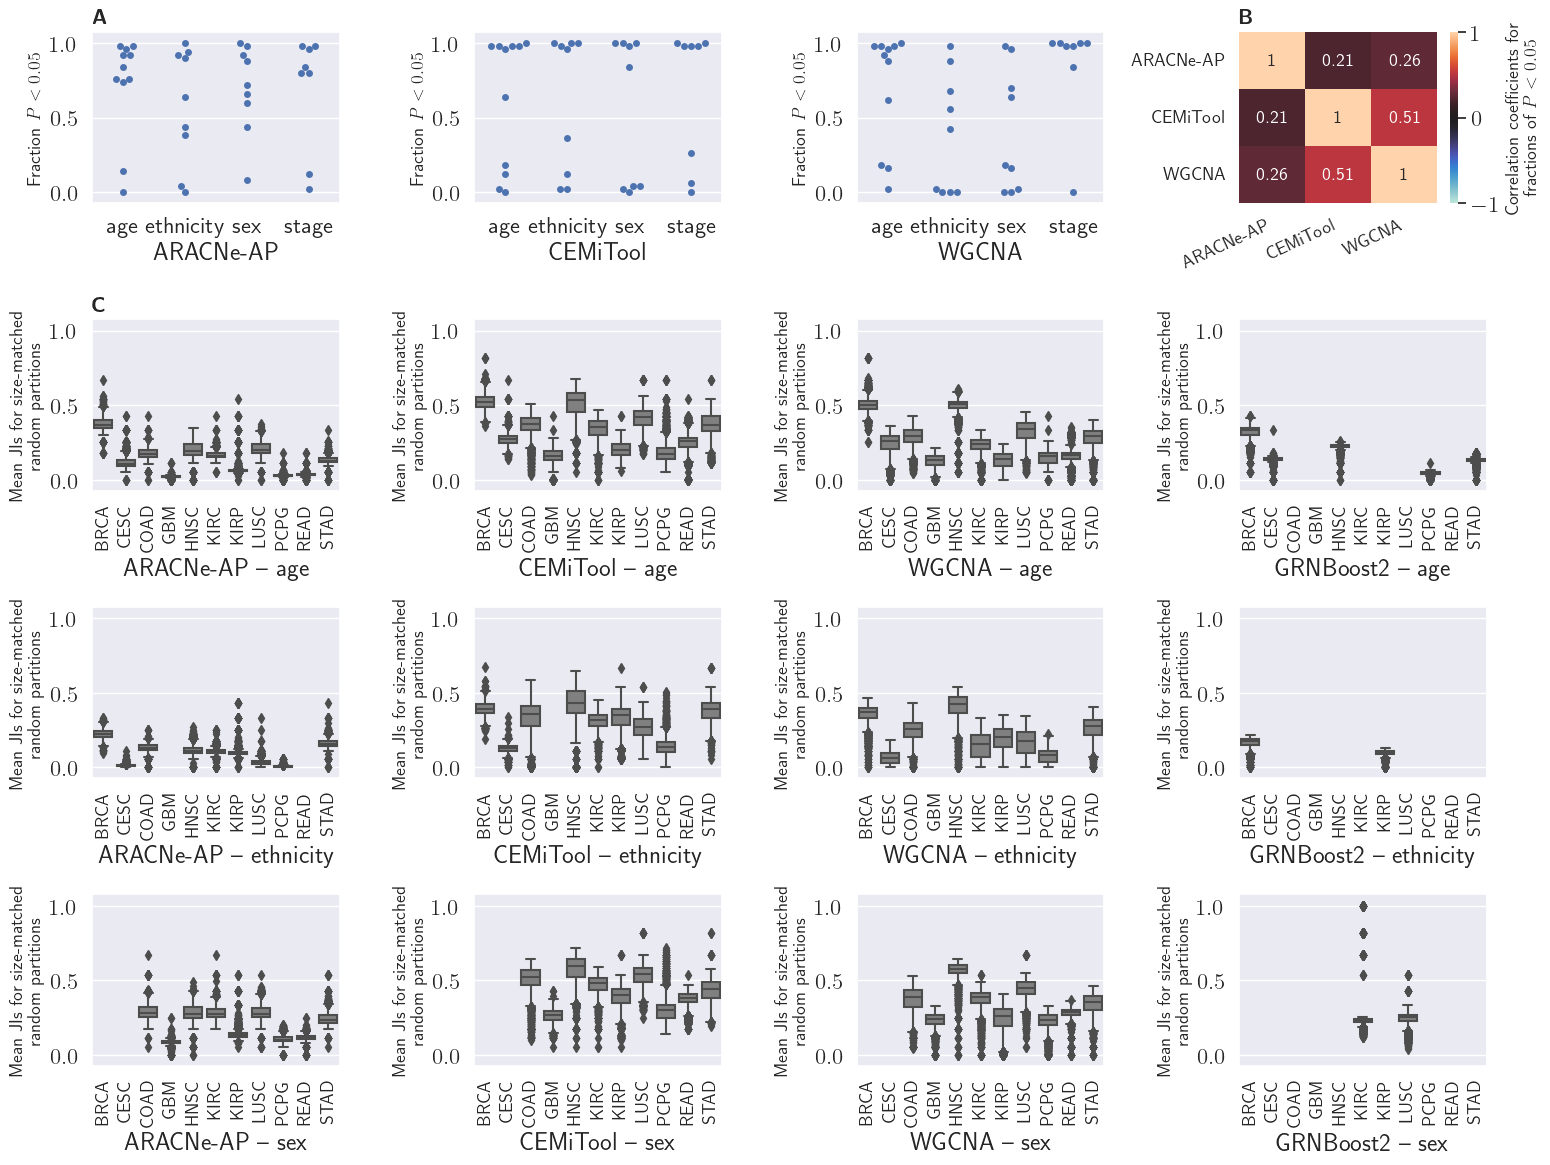

In [12]:
JI_all_random = JI_all[JI_all['Partition type'] == 'random partition']
JI_all_random = JI_all_random[JI_all_random['Confounder/\nvariable'] != 'stage']
plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',{'axes.grid' : True})
confounders = sorted(list(set(JI_all_random['Confounder/\nvariable'].values)))
algos = ['ARACNe-AP','CEMiTool','WGCNA','GRNBoost2']
cohorts = sorted(list(set(JI_all_random['Cohort'].values)))
mosaic = [['ARACNe-AP','CEMiTool','WGCNA','heatmap'],
          [f'{algo} – age' for algo in algos],
          [f'{algo} – ethnicity' for algo in algos],
          [f'{algo} – sex' for algo in algos]]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4*len(algos), 3*(len(confounders)+1)),sharex=False, sharey=False)
for algo in ['ARACNe-AP','CEMiTool','WGCNA']:
    axs[algo].set_ylim([-0.075, 1.075])
    _mwus_alg = _mwus[_mwus['Method'] == algo]
    sns.swarmplot(data=_mwus_alg,y='frac',x='Confounder/\nvariable',ax=axs[algo])
    axs[algo].set_ylabel('Fraction $P<0.05$',fontsize=13)
    axs[algo].set_xlabel(algo)
for conf in confounders:
    JI_conf = JI_all_random[JI_all_random['Confounder/\nvariable'] == conf]
    for algo in algos:
        conf_alg = f'{algo} – {conf}'
        axs[conf_alg].set_ylim([-0.075, 1.075])
        JI_alg = JI_conf[JI_conf['Method'] == algo]
        sns.boxplot(data=JI_alg,y='Mean JI',x='Cohort',ax=axs[conf_alg],order=cohorts,color='grey')
        axs[conf_alg].set_ylabel('Mean JIs for size-matched\nrandom partitions',fontsize=13)
        axs[conf_alg].set_xlabel(f'{algo} – {conf}')
        axs[conf_alg].set_xticklabels(axs[conf_alg].get_xticklabels(), rotation=90,fontsize=13)
    axs['ARACNe-AP'].set_title(r'\textbf{A}',loc='left', fontsize=15)
    axs['ARACNe-AP – age'].set_title(r'\textbf{C}',loc='left', fontsize=15)
sns.heatmap(corr_coeff,annot=True,center=0.0,vmin=-1,vmax=1,ax=axs['heatmap'],annot_kws={'fontsize':13})
colorbar = axs['heatmap'].collections[0].colorbar
colorbar.set_label('Correlation coefficients for\nfractions of $P<0.05$',fontsize=13)
axs['heatmap'].set_xticklabels(axs['heatmap'].get_xticklabels(), rotation=25, ha='right',fontsize=13)
axs['heatmap'].set_yticklabels(axs['heatmap'].get_yticklabels(), fontsize=13)
axs['heatmap'].set_xlabel('')
axs['heatmap'].set_ylabel('')
axs['heatmap'].set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.tight_layout()
fig.savefig('plots/fig4big.pdf')

## Generate plots for method-centric view – small plot

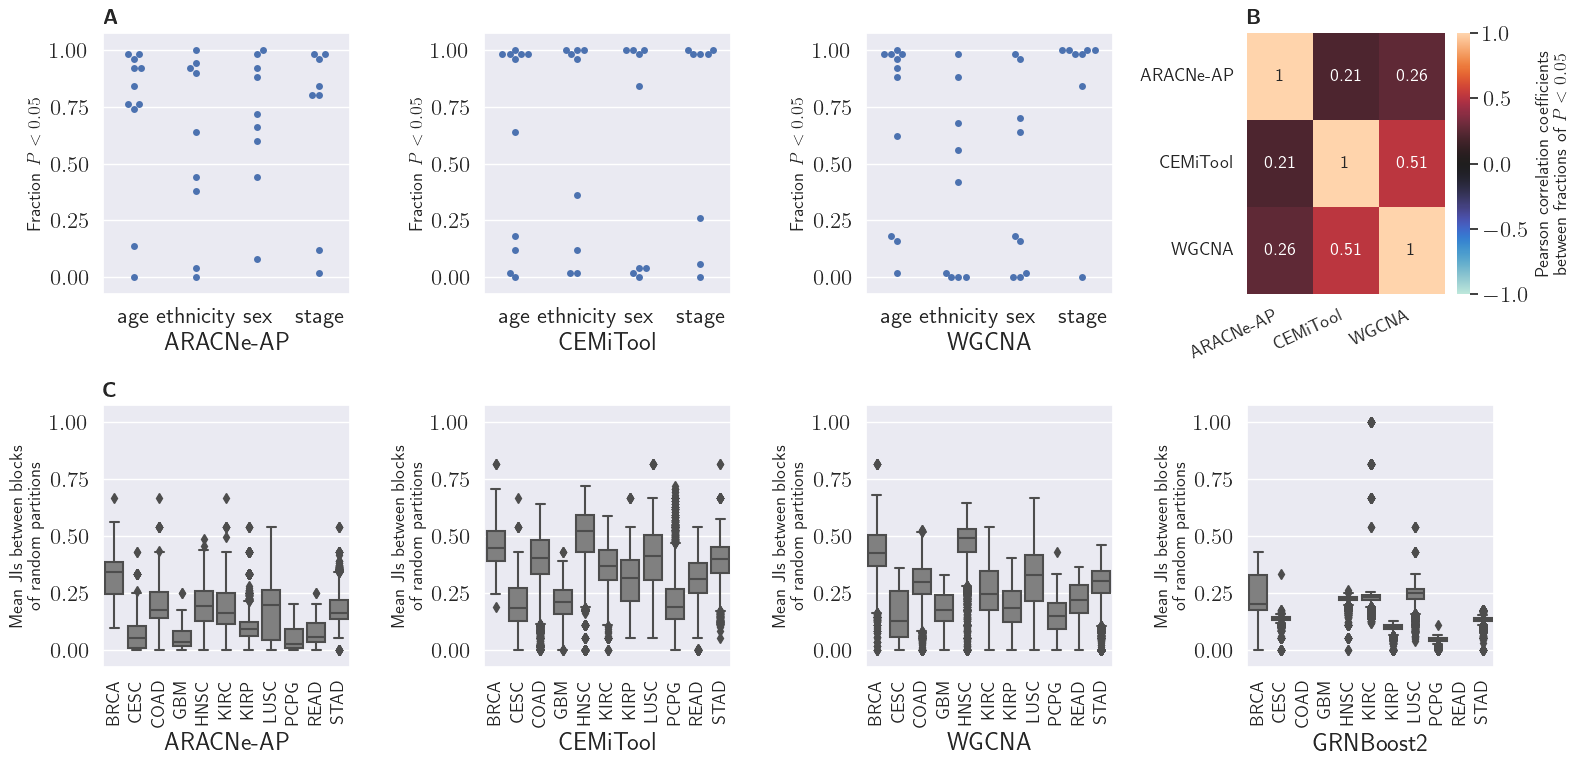

In [13]:
JI_all_random = JI_all[JI_all['Partition type'] == 'random partition']
JI_all_random = JI_all_random[JI_all_random['Confounder/\nvariable'] != 'stage']
plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',{'axes.grid' : True})
confounders = sorted(list(set(JI_all_random['Confounder/\nvariable'].values)))
algos = ['ARACNe-AP','CEMiTool','WGCNA','GRNBoost2']
cohorts = sorted(list(set(JI_all_random['Cohort'].values)))
mosaic = [['ARACNe-AP','CEMiTool','WGCNA','heatmap'],
          ['ARACNe-AP,r','CEMiTool,r','WGCNA,r','GRNBoost2,r']]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4*4, 4*2),sharex=False, sharey=False)
for algo in ['ARACNe-AP','CEMiTool','WGCNA']:
    axs[algo].set_ylim([-0.075, 1.075])
    _mwus_alg = _mwus[_mwus['Method'] == algo]
    sns.swarmplot(data=_mwus_alg,y='frac',x='Confounder/\nvariable',ax=axs[algo])
    axs[algo].set_ylabel('Fraction $P<0.05$',fontsize=13)
    axs[algo].set_xlabel(algo)
for algo in algos:
    conf_alg = f'{algo},r'
    axs[conf_alg].set_ylim([-0.075, 1.075])
    JI_alg = JI_all_random[JI_all_random['Method'] == algo]
    sns.boxplot(data=JI_alg,y='Mean JI',x='Cohort',ax=axs[conf_alg],order=cohorts,color='grey')
    axs[conf_alg].set_ylabel('Mean JIs between blocks\nof random partitions',fontsize=13)
    axs[conf_alg].set_xlabel(algo)
    axs[conf_alg].set_xticklabels(axs[conf_alg].get_xticklabels(), rotation=90,fontsize=13)
axs['ARACNe-AP'].set_title(r'\textbf{A}',loc='left', fontsize=15)
axs['ARACNe-AP,r'].set_title(r'\textbf{C}',loc='left', fontsize=15)
sns.heatmap(corr_coeff,annot=True,center=0.0,vmin=-1,vmax=1,ax=axs['heatmap'],annot_kws={'fontsize':13})
colorbar = axs['heatmap'].collections[0].colorbar
colorbar.set_label('Pearson correlation coefficients\nbetween fractions of $P<0.05$',fontsize=13)
axs['heatmap'].set_xticklabels(axs['heatmap'].get_xticklabels(), rotation=25, ha='right',fontsize=13)
axs['heatmap'].set_yticklabels(axs['heatmap'].get_yticklabels(), fontsize=13)
axs['heatmap'].set_xlabel('')
axs['heatmap'].set_ylabel('')
axs['heatmap'].set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.tight_layout()
fig.savefig('plots/fig4.pdf')

## Prepare data frames for plot showing results of the first part of the test protocol

In [14]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
cwd = os.getcwd()
alpha = 0.05

def align(pheno, expr):
    keep = pheno.index.isin(expr.index)
    pheno = pheno[keep]
    pheno = pheno[pheno.index.isin(expr.index)]
    samples = pheno.index            
    expr = expr.loc[samples]
    expr = expr.loc[:, (expr.std() != 0)]
    pheno = pheno[pheno.index.isin(expr.index)]
    return pheno, expr

def get_conf_partition(pheno_data_orig, confounder_selector, rank, thresh=0, verbose=False):
    pheno_data = pheno_data_orig.copy()
    indices = None
    blocks = []
    printer = []
    pheno_field = ''  
    if confounder_selector == 'age':
        pheno_field = 'age_at_initial_pathologic_diagnosis'
        if 'age_at_initial_pathologic_diagnosis' not in list(pheno_data.columns):
            pheno_field = 'age'
    elif confounder_selector == 'ethnicity':
        pheno_field = 'race.demographic'
        if 'race.demographic' not in list(pheno_data.columns):
            pheno_field = 'ethnicity'
    elif confounder_selector == 'sex':
        pheno_field = 'gender.demographic'
        if 'gender.demographic' not in list(pheno_data.columns):
            pheno_field = 'sex'
    elif confounder_selector == 'stage':
        pheno_field = 'tumor_stage.diagnoses'
        if 'tumor_stage.diagnoses' not in list(pheno_data.columns):
            pheno_field = 'stage'
        print('stage x:')
        print(len(pheno_data[pheno_data[pheno_field].str.strip().isin(['stage x'])]))
        pheno_data = pheno_data[pheno_data[pheno_field] != 'stage x']
        pheno_data.loc[pheno_data['tumor_stage.diagnoses'].str.strip().isin(['stage ia', 'stage ib', 'stage ic']), pheno_field] = 'stage i'
        pheno_data.loc[pheno_data['tumor_stage.diagnoses'].str.strip().isin(['stage iia', 'stage iib', 'stage iic']), pheno_field] = 'stage ii'
        pheno_data.loc[pheno_data['tumor_stage.diagnoses'].str.strip().isin(['stage iiia', 'stage iiib', 'stage iiic', 'stage iv', 'stage iva', 'stage ivb', 'stage ivc']), pheno_field] = 'stage iii'
    elif confounder_selector == 'type':
        pheno_field = 'cohort'
    print('na:')
    print(len(pheno_data[pheno_data[pheno_field].isna()])+len(pheno_data[pheno_data[pheno_field] == 'not reported']))
    pheno_data = pheno_data[pheno_data[pheno_field].notna()]
    pheno_data = pheno_data[pheno_data[pheno_field] != 'not reported']
    if confounder_selector != 'age':
        blocks = sorted(list(set(pheno_data[pheno_field].str.strip().values)))
        for block_attr in blocks:
            samples = pheno_data.loc[pheno_data[pheno_field].str.strip() == block_attr].index.tolist()
            if len(samples) >= thresh:
                printer.append((samples, block_attr))
    elif confounder_selector == 'age':       
        samples_lower = []
        samples_upper = []
        for cohort in set(pheno_data['cohort'].str.strip().values):
            pheno_cohort = pheno_data[pheno_data['cohort'] == cohort]
            pheno_cohort = pheno_cohort[pheno_cohort[pheno_field] != 'na']
            lower, upper = pheno_cohort[pheno_field].quantile(0.25), pheno_cohort[pheno_field].quantile(0.75)
            if verbose:
                print(f'\tlower quartile: [{pheno_cohort[pheno_field].values.min()},{lower}]')
                print(f'\tupper quartile: ({upper},{pheno_cohort[pheno_field].values.max()}]')
            samples_lower.extend(pheno_cohort.loc[pheno_cohort[pheno_field] <= lower].index.tolist())
            samples_upper.extend(pheno_cohort.loc[pheno_cohort[pheno_field] > upper].index.tolist())
        if len(samples_lower) >= thresh and len(samples_upper) >= thresh:
            printer.append((samples_lower, 'lower'))
            printer.append((samples_upper, 'upper'))
    return printer

def stage_conf_chi(pheno):
    confs = ['age', 'ethnicity', 'sex', 'stage']
    sc = {'age':np.nan, 'ethnicity':np.nan, 'sex':np.nan}
    for conf in confs:
        out = []
        confusion_table = pd.DataFrame()
        orig_conf_partition = get_conf_partition(pheno, conf, 0, thresh=20, verbose=True)
        for bl in orig_conf_partition:
            block = bl[0]
            try:
                stage_partition = get_conf_partition(pheno[pheno.index.isin(block)], 'stage', 0)
            except:
                print('no stage variable')
                continue
            for stage_block in stage_partition:
                confusion_table.loc[stage_block[1], bl[1]] = len(stage_block[0])
        try:
            if len(confusion_table) <= 1:
                continue
            confusion_table = confusion_table.dropna()
            chi2, p, dof, ex = chi2_contingency(confusion_table, correction=False)
            sc[str(conf)] = p
        except:
            continue
    return sc

def get_expression_data(cohort):
    expression_data = pd.read_csv(os.path.join(os.getcwd(), 'datasets', f'TCGA-{cohort}.htseq_fpkm.tsv'), sep='\t', header=0, index_col=0)
    expression_data.columns = expression_data.columns.str.split('.').str[0].tolist()
    # gene filtering is removed here, because it does not affect the set of samples present in the file
    return expression_data

def get_pheno_data(cohort):
    tissue_type_field, tissue_type = 'sample_type.samples', 'Primary Tumor'
    pheno_data = pd.read_csv(os.path.join(os.getcwd(), 'datasets', f'TCGA-{cohort}.GDC_phenotype.tsv'), sep='\t', header=0, index_col='submitter_id.samples')
    assert len(pheno_data.iloc[0]) == len(pheno_data.iloc[0].values)
    pheno_data['cohort'] = str(cohort)
    pheno_data =  pheno_data[pheno_data[tissue_type_field] == tissue_type]
    return pheno_data

df = pd.DataFrame(columns=['cohort', 'age', 'ethnicity', 'sex'])
cohorts = ['BRCA', 'CESC', 'COAD', 'GBM', 'HNSC', 'KIRC', 'KIRP', 'LUSC', 'PCPG', 'READ', 'STAD']
for cohort in cohorts:
    # read single data
    expr = get_expression_data(cohort)
    pheno = get_pheno_data(cohort)
    # align pheno and expr
    pheno, expr = align(pheno, expr)
    sc = stage_conf_chi(pheno)
    temp = pd.DataFrame({'cohort':[str(cohort)], 'age':[sc['age']], 'ethnicity':[sc['ethnicity']], 'sex':[sc['sex']]})
    df = pd.concat([df, temp])  
    
df_work = df.copy()
df_work = df_work.dropna().reset_index()
df_work = df_work.reset_index()
df_work.index = df_work['cohort'].values
df_work = df_work.drop(['cohort', 'index', 'level_0'], axis=1)
df_work.columns = ['age', 'ethnicity', 'sex']

def convert_pvalue_to_asterisks(p):
    if p <= 0.0001:
        return 4
    elif p <= 0.001:
        return 3
    elif p <= 0.01:
        return 2
    elif p <= 0.05:
        return 1
    else:
        return 0

mwus = pd.DataFrame(columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
algs = ['GRNBoost2']
for alg_sel in algs:
    JI_ = JI_all[JI_all['Method'] == alg_sel]
    for cohort in ct_sels:
        coh = JI_[JI_['Cohort'] == cohort]
        for conf_sel in confs:
            conf = coh[coh['Confounder/\nvariable'] == conf_sel]
            if len(conf) == 0:
                continue
            c = conf[conf['Partition type']=='confounder-based partition']
            r = conf[conf['Partition type']=='random partition']
            for k in sorted(list(set(c['k']))):
                c_k = c[c['k'] == k]
                r_k = r[r['k'] == k]
                mwu = mannwhitneyu(c_k['Mean JI'],r_k['Mean JI'], alternative='less')
                df = pd.DataFrame([[alg_sel, cohort, conf_sel, k, mwu.pvalue]], columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
                mwus = pd.concat([mwus, df])
mwus.reset_index(inplace=True)
mwus['Cohort - Variable'] = mwus['Cohort'] + ' – ' + mwus['Confounder/\nvariable']
mwus['k'] = pd.Categorical(mwus['k'], range(10, 5000, 100))
mwus['-log(p)'] = -np.log10(mwus['mwu.pvalue'])
cohort_confs = sorted(list(set(mwus['Cohort - Variable'].values)))

na:
1
	lower quartile: [26.0,49.0]
	upper quartile: (67.0,90.0]
stage x:
3
na:
4
stage x:
3
na:
3
na:
95
stage x:
0
na:
0
stage x:
4
na:
1
stage x:
5
na:
8
na:
1
stage x:
12
na:
11
stage x:
12
na:
12
stage x:
0
na:
0
stage x:
0
na:
0
stage x:
0
na:
0
na:
0
	lower quartile: [20,38.0]
	upper quartile: (56.25,88]
stage x:
0
na:
80
stage x:
0
na:
76
na:
36
stage x:
0
na:
20
stage x:
0
na:
30
stage x:
0
na:
209
na:
0
stage x:
0
na:
304
stage x:
0
na:
304
na:
2
	lower quartile: [31.0,58.0]
	upper quartile: (77.0,90.0]
stage x:
0
na:
4
stage x:
0
na:
2
na:
173
stage x:
0
na:
0
stage x:
0
na:
10
na:
2
stage x:
0
na:
4
stage x:
0
na:
7
stage x:
0
na:
13
stage x:
0
na:
0
stage x:
0
na:
0
stage x:
0
na:
0
na:
1
	lower quartile: [21.0,51.25]
	upper quartile: (69.75,89.0]
stage x:
0
na:
39
stage x:
0
na:
39
na:
2
stage x:
0
na:
138
na:
1
stage x:
0
na:
54
stage x:
0
na:
100
stage x:
0
na:
155
na:
1
	lower quartile: [19.0,53.0]
	upper quartile: (69.0,90.0]
stage x:
0
na:
19
stage x:
0
na:
18
na:
15


## Generate plots showing results of first part of the test protocol

/var/folders/71/cy2w33mn5wng7mg2_mdj3x2h0000gn/T/ipykernel_3682/3843068626.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
/var/folders/71/cy2w33mn5wng7mg2_mdj3x2h0000gn/T/ipykernel_3682/3843068626.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
/var/folders/71/cy2w33mn5wng7mg2_mdj3x2h0000gn/T/ipykernel_3682/3843068626.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
/var/folders/71/cy2w33mn5wng7mg2_mdj3x2h0000gn/T/ipykernel_3682/3843068626.py:56: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


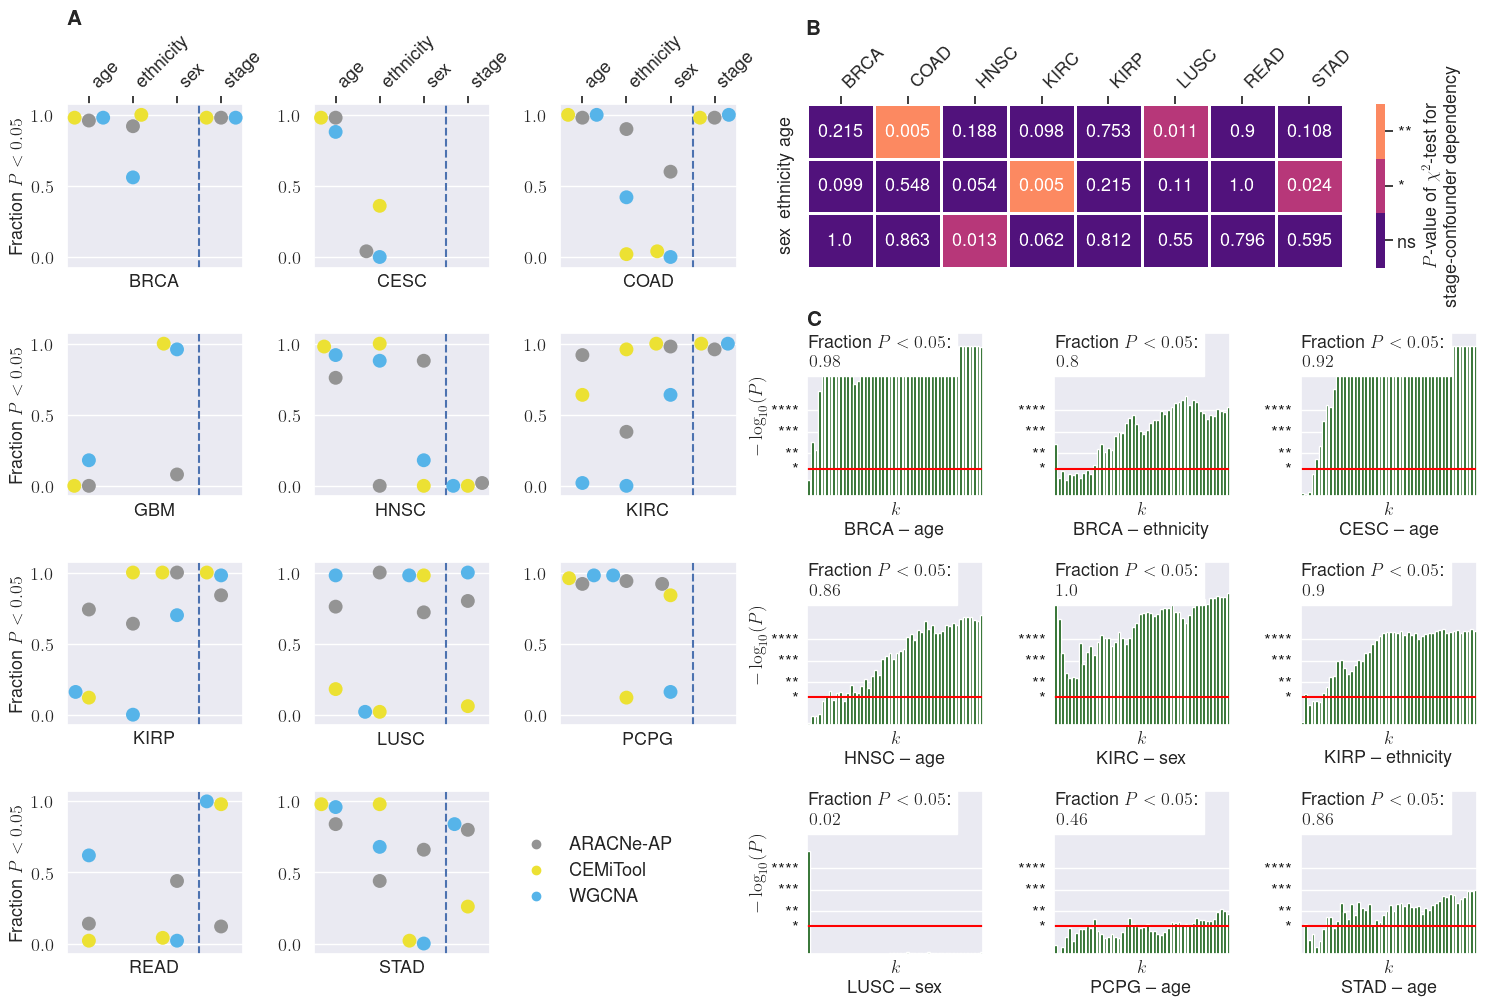

In [15]:
sns.set(font_scale=1.2)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
mosaic = [ct_sels[:3] + ['heatmap' for _ in range(3)],
          ct_sels[3:6] + cohort_confs[:3],
          ct_sels[6:9] + cohort_confs[3:6],
          ct_sels[9:11] + ['.'] + cohort_confs[6:9]]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(6*2.5,4*2.5),sharex=False, sharey=False)
for ct_sel in ct_sels:
    _mwus_ct = _mwus[_mwus['Cohort'] == ct_sel]
    sns.swarmplot(data=_mwus_ct, ax=axs[ct_sel], x='Confounder/\nvariable', y='frac', hue='Method', s=10, palette=sns.color_palette('colorblind')[7:10])
    axs[ct_sel].axvline(x=2.5, linestyle='--')
    axs[ct_sel].set_ylim([-0.075, 1.075])
    if ct_sel == ct_sels[0]:
        axs[ct_sel].set_title(r'\textbf{A}',loc='left', fontsize=15)
        sns.move_legend(axs[ct_sel], "lower center", frameon=False, ncol=1, title=None, bbox_to_anchor=(3,-4))
    else:
        axs[ct_sel].legend().set_visible(False)
    if ct_sel in ct_sels[:3]:
        axs[ct_sel].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
    else:
        axs[ct_sel].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    axs[ct_sel].set(xlabel=None, ylabel=None)
    axs[ct_sel].set_xlabel(ct_sel, fontsize=13)
    if ct_sel in [ct_sels[3*i] for i in range(4)]:
        axs[ct_sel].set_ylabel('Fraction $P<0.05$', labelpad=3, fontsize=13)

for cohort_conf in cohort_confs:
    axs[cohort_conf].set_ylim([0, 7.6])
    axs[cohort_conf].axhline(y=-np.log10(0.05), linestyle='-', color='red')
    axs[cohort_conf].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    mwus_cohort_conf = mwus[mwus['Cohort - Variable'] == cohort_conf]
    sns.barplot(data=mwus_cohort_conf, x='k', y='-log(p)', ax=axs[cohort_conf], color='darkgreen')
    axs[cohort_conf].set(ylabel=None)
    axs[cohort_conf].set_yticks([-np.log10(0.05),-np.log10(0.01),-np.log10(0.001),-np.log10(0.0001)])
    axs[cohort_conf].set_yticklabels(['*','**','***','****'], fontsize=13)
    axs[cohort_conf].tick_params(axis='y', which='major', pad=0)
    axs[cohort_conf].set_xlabel('$k$\n'+cohort_conf, fontsize=13)
    if cohort_conf in [cohort_confs[3*i] for i in range(3)]:
        axs[cohort_conf].set_ylabel('$-\log_{10}(P)$', fontsize=13,  labelpad=3)
    if cohort_conf == cohort_confs[0]:
        axs[cohort_conf].set_title(r'\textbf{C}',loc='left', fontsize=15)
    frac = mwus_cohort_conf[mwus_cohort_conf['mwu.pvalue'] < 0.05].shape[0] / mwus_cohort_conf.shape[0]
    axs[cohort_conf].text(.01, .99, f'Fraction $P<0.05$:\n${frac}$', ha='left', va='top', transform=axs[cohort_conf].transAxes,
                          fontsize=13, backgroundcolor='white')
cmap2 = sns.color_palette("magma", 3)

ast = pd.DataFrame(np.array([df_work['age'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['ethnicity'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['sex'].apply(convert_pvalue_to_asterisks).to_numpy()]), index=df_work.columns,
                columns = df_work.index)#.T

cur = df_work.T
cur = round(cur, 3)
plt.tight_layout()
sns.heatmap(ast, ax=axs['heatmap'], vmin=0, vmax=2, annot=cur, cmap=cmap2, cbar=True, fmt = '', annot_kws={'fontsize':13}, linewidths=1)
axs['heatmap'].set_yticklabels(axs['heatmap'].get_ymajorticklabels(),fontsize=13)
#axs['heatmap'].set_xticklabels(axs['heatmap'].get_xmajorticklabels())
axs['heatmap'].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs['heatmap'].set_xticklabels(axs['heatmap'].get_xticklabels(), rotation=45, ha='left',fontsize=13)
colorbar = axs['heatmap'].collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / 3 * (0.5 + i) for i in range(3)])
colorbar.set_ticklabels(['ns','*','**'], fontsize='13')
colorbar.set_label('$P$-value of $\chi^2$-test for\nstage-confounder dependency', fontsize='13')
axs['heatmap'].set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.subplots_adjust(left=0.05,
                    bottom=0.05,
                    right=.99,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
fig.savefig('plots/fig2.pdf')

## Generate data frames for second part of the test protocol

In [115]:
alg_sels = ['WGCNA', 'CEMITOOL', 'ARACNE', 'GRNBOOST2']
ct_sels = ['BRCA', 'CESC', 'HNSC', 'STAD', 'KIRC', 'KIRP']
conf_sels = ['age_at_initial_pathologic_diagnosis','race.demographic','gender.demographic']
blocks = {'age_at_initial_pathologic_diagnosis': ['lower', 'upper'],
          'race.demographic': ['asian', 'black or african american', 'white'],
          'gender.demographic': ['female', 'male']}
fro = 0
to = 10
cwd = os.getcwd()
JI = {'Confounder': [], 'Cohort': [], 'Method': [], 'Demographic group': [], 'Sampling': [], 'partID': [], 'k': [], 'Mean JI': []}
for alg_sel in alg_sels:
    for conf_sel in conf_sels:
        for ct_sel in ct_sels:
            for block in blocks[conf_sel]:
                path = os.path.join(cwd, 'mean_JI_G_all_comparisons')
                for i in range(fro, to):
                    for t in ['conf', 'rnd']:
                        filename = f'g_all_{t}_{i}_{str(alg_sel)}_{str(conf_sel)}_{str(ct_sel)}_{block}_jaccInd.csv'
                        try:
                            res = pd.read_csv(os.path.join(path, filename), sep=',', usecols=['k','mean JI'])
                            num_rows = res.shape[0]
                            JI['Confounder'] += [conf_sel for _ in range(num_rows)]
                            JI['Cohort'] += [ct_sel for _ in range(num_rows)]
                            JI['Method'] += [alg_sel for _ in range(num_rows)]
                            if conf_sel == 'age_at_initial_pathologic_diagnosis':
                                subgroup = f'{block.capitalize()} age quartile'
                            else:
                                subgroup = f'{block.capitalize()}'
                            JI['Demographic group'] += [subgroup for _ in range(num_rows)]
                            if t == 'rnd':
                                JI['Sampling'] += ['Size-matched random' for _ in range(num_rows)]
                            else:
                                JI['Sampling'] += ['Demography-based' for _ in range(num_rows)]
                            JI['partID'] += [i for _ in range(num_rows)]
                            JI['k'] += list(res['k'])
                            JI['Mean JI'] += list(res['mean JI'])
                        except:
                            continue
JI = pd.DataFrame(data=JI)
JI['Confounder'] = JI['Confounder'].replace(['age_at_initial_pathologic_diagnosis'], 'age').replace(['race.demographic'], 'ethnicity').replace(['gender.demographic'], 'sex')
JI = JI.replace('ARACNE', 'ARACNe-AP').replace('CEMITOOL', 'CEMiTool').replace('GRNBOOST2', 'GRNBoost2').replace('Black or african american', 'Black or African American')
JI = JI[JI['k']%100 == 10]
JI['Cohort – confounder'] = JI['Cohort'] + ' – ' + JI['Confounder']
JI['Method'] = pd.Categorical(JI['Method'], ['ARACNe-AP', 'CEMiTool', 'GRNBoost2', 'WGCNA'])
JI['Cohort – confounder'] = pd.Categorical(JI['Cohort – confounder'], list(JI['Cohort – confounder'].unique()))
JI['Demographic group'] = pd.Categorical(JI['Demographic group'], list(JI['Demographic group'].unique()))

## Plot interesting results for main paper

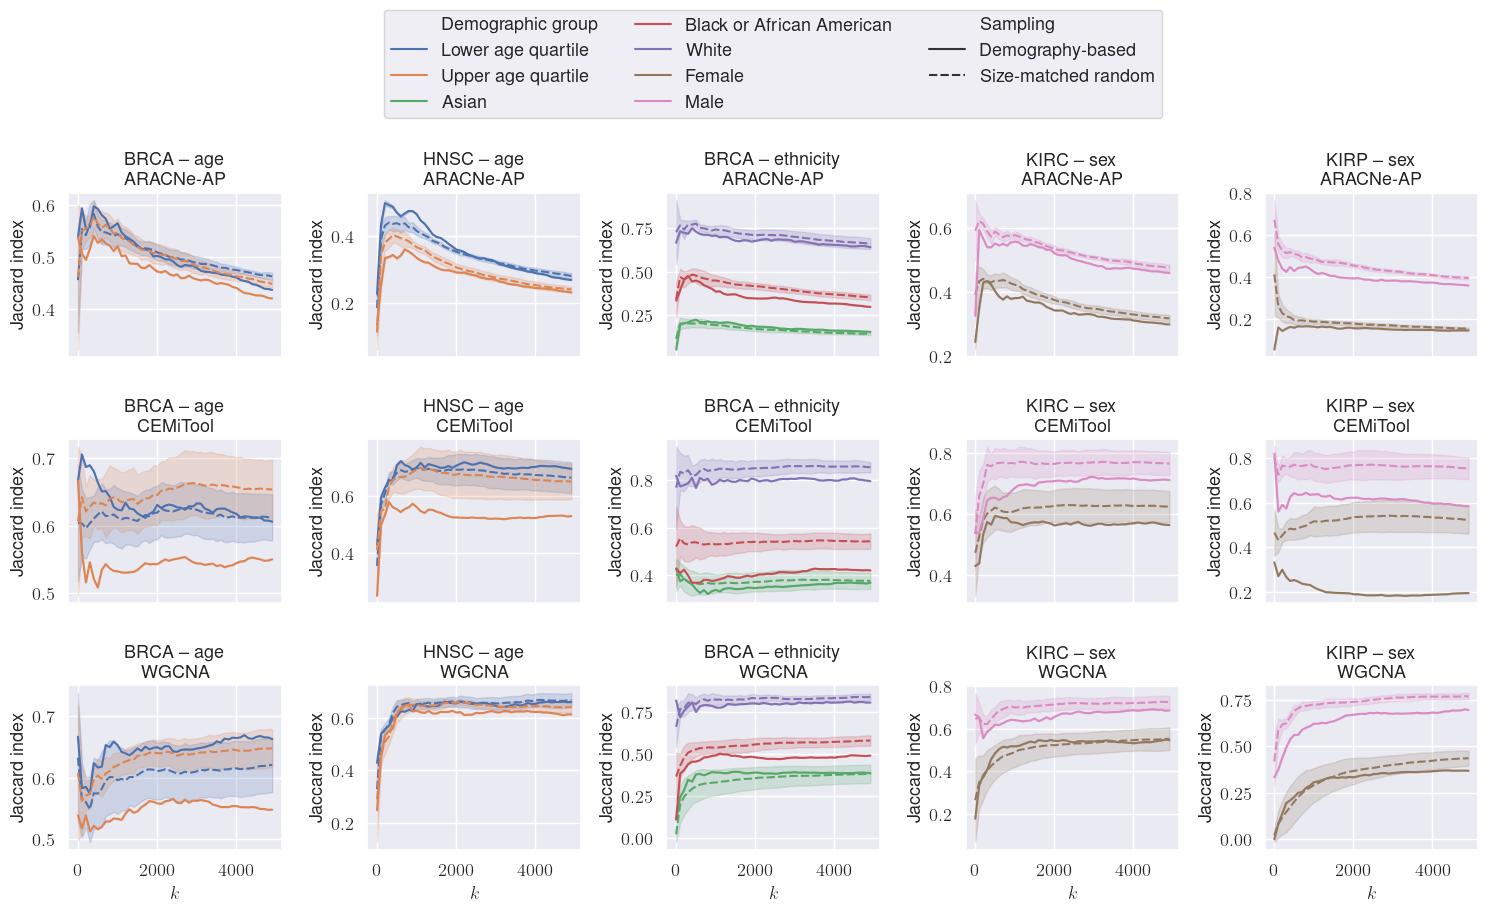

In [134]:
sns.set(font_scale=1.2)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
selected_coco_pairs = ['BRCA – age','HNSC – age','BRCA – ethnicity','KIRC – sex','KIRP – sex']
algos = list(set(JI['Method'].values))
algos = ['ARACNe-AP','CEMiTool', 'WGCNA']
fig, axs = plt.subplots(len(algos), len(selected_coco_pairs), figsize=(6*2.5, 3*len(algos)), sharex=True, sharey=False)
for j, coco in enumerate(selected_coco_pairs):
    JI_coco = JI[JI['Cohort – confounder'] == coco]
    for i, algo in enumerate(algos):
        JI_alg = JI_coco[JI_coco['Method'] == algo]
        sns.lineplot(data=JI_alg, x='k', y='Mean JI', errorbar='sd', ax=axs[i,j], style='Sampling', hue='Demographic group')
        if i == 0 and j == 2:
            sns.move_legend(axs[i,j], "lower center", ncol=3, bbox_to_anchor=(0.5, 1.4), fontsize=13)
        else:
            axs[i,j].legend().set_visible(False)
        axs[i,j].set_title(f'{coco}\n{algo}', fontsize=13)
        axs[i,j].set_xlabel('$k$', fontsize=13)
        axs[i,j].set_ylabel('Jaccard index', fontsize=13)
fig.subplots_adjust(left=0.05,
                    bottom=0.06,
                    right=.99,
                    top=0.79,
                    wspace=0.4,
                    hspace=0.5)
fig.savefig('plots/fig3.pdf')

## Plot less interesting results for supplement

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


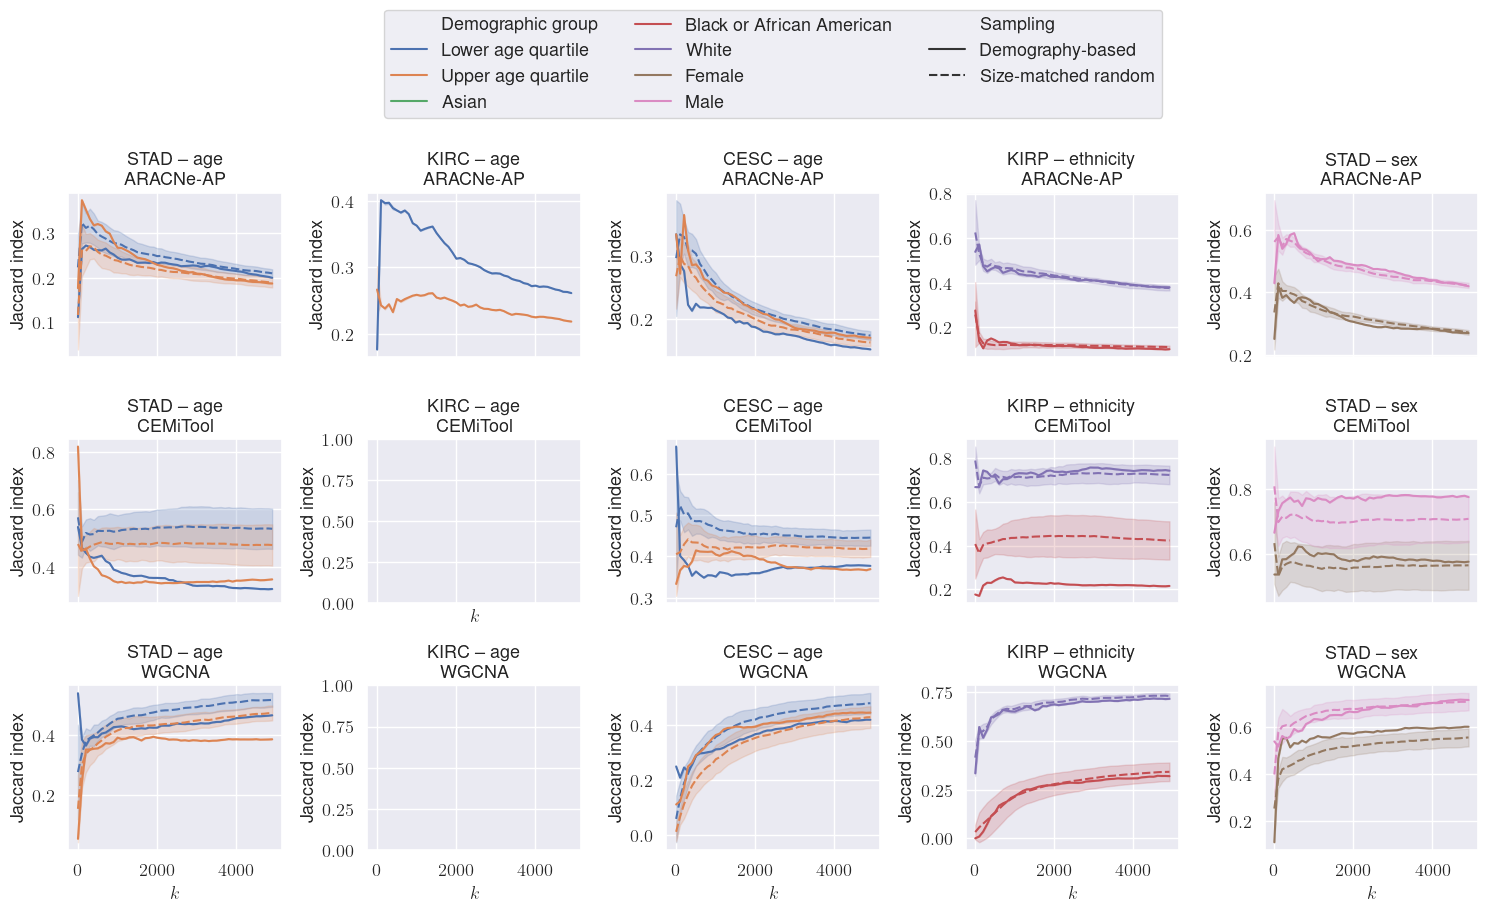

In [135]:
sns.set(font_scale=1.2)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
other_coco_pairs = list(set(JI['Cohort – confounder'].values).difference(set(selected_coco_pairs)))
algos = list(set(JI['Method'].values))
algos = ['ARACNe-AP','CEMiTool', 'WGCNA']
fig, axs = plt.subplots(len(algos), len(other_coco_pairs), figsize=(6*2.5, 3*len(algos)), sharex=True, sharey=False)
for j, coco in enumerate(other_coco_pairs):
    JI_coco = JI[JI['Cohort – confounder'] == coco]
    for i, algo in enumerate(algos):
        JI_alg = JI_coco[JI_coco['Method'] == algo]
        sns.lineplot(data=JI_alg, x='k', y='Mean JI', errorbar='sd', ax=axs[i,j], style='Sampling', hue='Demographic group')
        if i == 0 and j == 2:
            sns.move_legend(axs[i,j], "lower center", ncol=3, bbox_to_anchor=(0.5, 1.4), fontsize=13)
        else:
            axs[i,j].legend().set_visible(False)
        axs[i,j].set_title(f'{coco}\n{algo}', fontsize=13)
        axs[i,j].set_xlabel('$k$', fontsize=13)
        axs[i,j].set_ylabel('Jaccard index', fontsize=13)
fig.subplots_adjust(left=0.05,
                    bottom=0.06,
                    right=.99,
                    top=0.79,
                    wspace=0.4,
                    hspace=0.5)
fig.savefig('plots/g_all_supplement.pdf')